In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-gene-expression-cumida/Breast_GSE45827.csv
/kaggle/input/breast-cancer-genes/GPL570_limpo.txt


**Preprocessing**

In [3]:
data = pd.read_csv('../input/breast-cancer-gene-expression-cumida/Breast_GSE45827.csv')

In [4]:
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [5]:
print(data.shape)

(151, 54677)


In [6]:
data_1=data["type"].mask( data["type"] != "basal", "non-basal",inplace=False )
print(data_1.shape)

data_1.dropna()
 


(151,)


0          basal
1          basal
2          basal
3          basal
4          basal
         ...    
146    non-basal
147    non-basal
148    non-basal
149    non-basal
150    non-basal
Name: type, Length: 151, dtype: object

In [7]:
data
gene_data = data.iloc[:,2:].T.reset_index()
gene_data.head()

,index,0,1,2,3,4,5,6,7,8,...,141,142,143,144,145,146,147,148,149,150
0,1007_s_at,9.850040,9.861357,10.103478,9.756875,9.408330,7.505488,10.422371,10.190705,10.256077,...,10.449338,10.854862,10.747428,10.278358,10.355828,10.392638,10.930875,11.027098,10.444395,11.345817
1,1053_at,8.097927,8.212222,8.936137,7.357148,7.746404,8.802820,8.933601,7.813057,7.796936,...,7.379473,7.382476,7.984658,7.246941,7.158921,7.334408,8.415294,7.180876,7.525153,7.379299
2,117_at,6.424728,7.062593,5.735970,6.479183,6.693980,6.235074,5.630488,6.701297,6.725722,...,6.780362,6.541493,6.286557,6.757624,8.204383,6.848586,5.906827,6.304736,5.964460,5.891172
3,121_at,7.353027,7.685578,7.687822,6.986624,7.333426,7.202227,6.881770,6.921350,7.098550,...,6.954844,7.095581,7.227807,7.363606,7.055268,7.020486,7.753572,7.641197,7.825939,7.394586
4,1255_g_at,3.029122,3.149468,3.125931,3.181638,3.169923,2.987976,3.097372,3.140037,3.139031,...,3.108536,3.068560,3.115704,3.251219,3.127653,3.228065,3.270557,3.206950,3.384147,3.183420


In [8]:
raw_genes = pd.read_table("../input/breast-cancer-genes/GPL570_limpo.txt",delimiter="\t",index_col=0)
raw_genes.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
ID,,,,,,,,,,,,,,,
1007_s_at,U48705,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1053_at,M87338,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
117_at,X51757,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
121_at,X69699,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
1255_g_at,L36861,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...


In [9]:
new_index = pd.Series(raw_genes['Gene Symbol'],name='index')
new_index

ID
1007_s_at          DDR1 /// MIR4640
1053_at                        RFC2
117_at                        HSPA6
121_at                         PAX8
1255_g_at                    GUCA1A
                         ...       
AFFX-ThrX-5_at                  NaN
AFFX-ThrX-M_at                  NaN
AFFX-TrpnX-3_at                 NaN
AFFX-TrpnX-5_at                 NaN
AFFX-TrpnX-M_at                 NaN
Name: index, Length: 54675, dtype: object

In [10]:
new_index[new_index =="TIAM1"]

ID
206409_at    TIAM1
213135_at    TIAM1
Name: index, dtype: object

In [11]:
gene_data["index"].update(list(new_index))
gene_data

,index,0,1,2,3,4,5,6,7,8,...,141,142,143,144,145,146,147,148,149,150
0,DDR1 /// MIR4640,9.850040,9.861357,10.103478,9.756875,9.408330,7.505488,10.422371,10.190705,10.256077,...,10.449338,10.854862,10.747428,10.278358,10.355828,10.392638,10.930875,11.027098,10.444395,11.345817
1,RFC2,8.097927,8.212222,8.936137,7.357148,7.746404,8.802820,8.933601,7.813057,7.796936,...,7.379473,7.382476,7.984658,7.246941,7.158921,7.334408,8.415294,7.180876,7.525153,7.379299
2,HSPA6,6.424728,7.062593,5.735970,6.479183,6.693980,6.235074,5.630488,6.701297,6.725722,...,6.780362,6.541493,6.286557,6.757624,8.204383,6.848586,5.906827,6.304736,5.964460,5.891172
3,PAX8,7.353027,7.685578,7.687822,6.986624,7.333426,7.202227,6.881770,6.921350,7.098550,...,6.954844,7.095581,7.227807,7.363606,7.055268,7.020486,7.753572,7.641197,7.825939,7.394586
4,GUCA1A,3.029122,3.149468,3.125931,3.181638,3.169923,2.987976,3.097372,3.140037,3.139031,...,3.108536,3.068560,3.115704,3.251219,3.127653,3.228065,3.270557,3.206950,3.384147,3.183420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,5.016196,5.291005,5.171403,5.193356,5.040202,4.903888,4.952225,5.257033,5.081511,...,6.952386,7.399616,7.002475,6.040412,6.505394,4.971727,6.528948,6.882504,6.839086,5.661898
54671,AFFX-ThrX-M_at,4.901594,5.405839,5.184286,5.086569,5.235318,5.070672,5.264210,5.501919,5.570573,...,7.230109,7.769105,7.348992,6.773755,7.132860,6.209136,7.108210,7.329545,7.089259,6.460331
54672,AFFX-TrpnX-3_at,2.966657,2.934763,2.847684,3.031602,2.956232,2.809652,2.850506,2.878836,2.972532,...,2.943919,2.956626,2.842056,2.955884,2.886433,2.852852,2.929800,3.085127,3.018525,3.061585
54673,AFFX-TrpnX-5_at,3.508495,3.687666,3.550597,3.524981,3.445501,3.628336,3.620385,3.433119,3.642608,...,3.478029,3.362682,3.574123,3.800755,3.567305,3.697448,3.833289,3.628848,3.770597,3.857525


In [12]:
gene_data

,index,0,1,2,3,4,5,6,7,8,...,141,142,143,144,145,146,147,148,149,150
0,DDR1 /// MIR4640,9.850040,9.861357,10.103478,9.756875,9.408330,7.505488,10.422371,10.190705,10.256077,...,10.449338,10.854862,10.747428,10.278358,10.355828,10.392638,10.930875,11.027098,10.444395,11.345817
1,RFC2,8.097927,8.212222,8.936137,7.357148,7.746404,8.802820,8.933601,7.813057,7.796936,...,7.379473,7.382476,7.984658,7.246941,7.158921,7.334408,8.415294,7.180876,7.525153,7.379299
2,HSPA6,6.424728,7.062593,5.735970,6.479183,6.693980,6.235074,5.630488,6.701297,6.725722,...,6.780362,6.541493,6.286557,6.757624,8.204383,6.848586,5.906827,6.304736,5.964460,5.891172
3,PAX8,7.353027,7.685578,7.687822,6.986624,7.333426,7.202227,6.881770,6.921350,7.098550,...,6.954844,7.095581,7.227807,7.363606,7.055268,7.020486,7.753572,7.641197,7.825939,7.394586
4,GUCA1A,3.029122,3.149468,3.125931,3.181638,3.169923,2.987976,3.097372,3.140037,3.139031,...,3.108536,3.068560,3.115704,3.251219,3.127653,3.228065,3.270557,3.206950,3.384147,3.183420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,5.016196,5.291005,5.171403,5.193356,5.040202,4.903888,4.952225,5.257033,5.081511,...,6.952386,7.399616,7.002475,6.040412,6.505394,4.971727,6.528948,6.882504,6.839086,5.661898
54671,AFFX-ThrX-M_at,4.901594,5.405839,5.184286,5.086569,5.235318,5.070672,5.264210,5.501919,5.570573,...,7.230109,7.769105,7.348992,6.773755,7.132860,6.209136,7.108210,7.329545,7.089259,6.460331
54672,AFFX-TrpnX-3_at,2.966657,2.934763,2.847684,3.031602,2.956232,2.809652,2.850506,2.878836,2.972532,...,2.943919,2.956626,2.842056,2.955884,2.886433,2.852852,2.929800,3.085127,3.018525,3.061585
54673,AFFX-TrpnX-5_at,3.508495,3.687666,3.550597,3.524981,3.445501,3.628336,3.620385,3.433119,3.642608,...,3.478029,3.362682,3.574123,3.800755,3.567305,3.697448,3.833289,3.628848,3.770597,3.857525


In [13]:
result = gene_data.groupby('index').sum()
result.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
index,,,,,,,,,,,,,,,,,,,,,
1552829_at,6.741406,6.841960,5.742416,6.802268,6.101425,5.733255,6.504076,5.589713,5.854043,6.907315,...,5.907639,6.312731,5.361935,6.340180,5.716524,5.587539,6.409934,5.396149,5.728426,5.757099
1552867_at,5.054807,4.897123,4.130349,6.263929,5.751310,5.858156,6.495708,6.567856,6.018269,5.629224,...,5.793816,7.049004,7.096187,6.660572,5.411966,5.809615,7.856968,5.707392,5.967266,6.324585
1552961_at,3.918087,4.089133,3.901011,4.001060,3.885973,4.201607,4.043254,3.842727,3.922214,3.641443,...,3.901409,3.950262,3.925733,3.921817,4.034325,3.779556,3.936229,4.028548,3.857439,3.811229
1552974_at,2.886732,3.055663,2.826087,2.918325,2.835424,2.944885,2.727684,2.758969,2.752260,2.888060,...,2.888393,2.918246,2.892337,3.013317,2.620057,2.679735,2.757982,2.951655,2.815504,2.707502
1552975_x_at,3.432118,3.482647,3.427963,3.478165,3.567618,3.320472,3.400449,3.340387,3.483499,3.581019,...,3.697103,3.431473,3.562847,3.610691,3.419017,3.507929,3.451742,3.356011,3.502220,3.339160


In [69]:
res_1=result.transpose()


result_2=res_1.dropna()
result_2.head()

index,1552829_at,1552867_at,1552961_at,1552974_at,1552975_x_at,1552976_at,1553069_at,1553083_at,1553208_s_at,1553275_s_at,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,abParts /// IGKC /// IGKV4-1 /// IGKV4-1,av27s1 /// TRAV39 /// TRAV39,hsa-let-7a-3 /// hsa-let-7b /// hsa-mir-4763 /// MIRLET7BHG /// RP4-695O20__B.10,hsa-let-7a-3 /// hsa-let-7b /// hsa-mir-4763 /// RP4-695O20__B.10,mir-223
0,6.741406,5.054807,3.918087,2.886732,3.432118,4.003193,3.413638,4.469983,4.051897,4.263842,...,8.317378,27.272655,15.864546,17.373978,16.531335,10.549098,3.784928,5.193507,7.800669,3.664488
1,6.841960,4.897123,4.089133,3.055663,3.482647,3.665523,3.160204,4.334703,4.299006,4.809316,...,4.278075,24.053879,16.215959,15.707228,16.022294,8.657222,3.420760,5.008166,5.245844,4.113628
2,5.742416,4.130349,3.901011,2.826087,3.427963,4.104426,3.323183,4.548873,4.405442,4.311628,...,7.218792,23.982528,16.319153,16.889108,15.980342,8.596770,3.355913,5.043492,6.120926,3.893291
3,6.802268,6.263929,4.001060,2.918325,3.478165,4.254990,3.503337,4.511302,4.107439,5.128779,...,5.438462,23.590029,16.130671,17.657538,15.522481,10.254117,3.603215,5.292430,6.450703,4.455888
4,6.101425,5.751310,3.885973,2.835424,3.567618,3.881073,3.468075,4.635034,3.568155,5.417807,...,6.834816,26.526125,16.903516,17.193479,15.778461,9.444738,3.401807,5.402115,7.606936,4.130882


**X and Y**

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time
#features_selection=['LIMA1','TSPAN15','AF090939','ITSN1','MLPH','DEK','HYPK /// MIR1282 /// SERF2','THSD4','LOC100509445 /// LOC728715 /// OVOS /// OVOS2','TTC6']
X_data = result_2.loc[:, ]
y_data = data_1

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2,random_state=42)

accuracy_all = []
cvs_all = []

**Random Forest**

Random Forest Accuracy: 90.32%
Cross validation score: 85.35% (+/- 39.04%)
Execution time: 4.8296 seconds 

           Importance
index                
239606_at    0.017905
INPP4B       0.016301
AR           0.015964
FAM174A      0.011676
TRMT11       0.011318
...               ...
STAB2        0.001053
233037_at    0.001021
DHX36        0.001019
C9orf66      0.001016
POC1B        0.001014

[250 rows x 1 columns]


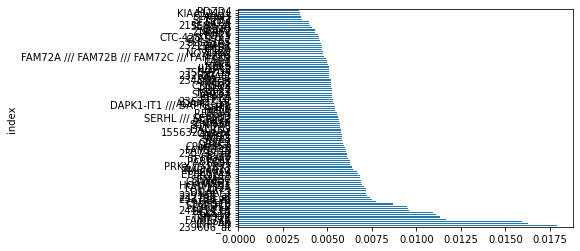

In [72]:
#The Model

from sklearn.ensemble import RandomForestClassifier

start=time.time()

clf_1 = RandomForestClassifier()
clf_1.fit(X_train, y_train)
prediction = clf_1.predict(X_test)
scores = cross_val_score(clf_1, X_data, y_data, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
feat_importances = pd.Series(clf_1.feature_importances_, index=result_2.columns)
feat_importances.nlargest(100).plot(kind='barh')
table=pd.DataFrame(feat_importances.nlargest(250), columns=["Importance"])
print(table)


table_csv= table.to_csv('genes.csv', index = True)


#Best Features




 



array([0., 0., 0., ..., 0., 0., 0.])

**SVC (Support Vector Classification)**

In [17]:
diag_map = {'basal':1, 'non-basal':0}
data_1= data_1.map(diag_map)
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X_data, y_data, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

if __name__=='__main__':
    
    param_grid = {'C' : [0.01, 0.1, 1, 10], 'kernel': ('rbf', 'linear')}
    
    classifier = SVC()
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', n_jobs=-1, verbose=42)
    grid_search.fit(X_data,y_data)



print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

#print("Best parameters: {0}".format(clf.best_params_))

end = time.time()







SVC Accuracy: 67.74%
Cross validation score: 72.86% (+/- 1.89%)
Execution time: 3.6811 seconds 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Accuracy: 67.74%
Cross validation score: 72.86% (+/- 1.89%)
Execution time: -0.0011146 seconds 



In [18]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf_2 = SGDClassifier()
clf_2.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf_2, X_data, y_data, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

import matplotlib.pyplot as plt

def plot_important_features(model, limiter):
    global result_2, classes
    indexes = np.where(model.feature_importances_ >= np.max(model.feature_importances_) / limiter)
    features = result_2.columns[indexes[0]]
    importancies = np.array(model.feature_importances_[indexes[0]])
    inds = importancies.argsort()
    features = features[inds][-10:]
    importancies = importancies[inds][-10:]
    print("Features                  Importancies", end = "\n\n")
    for feature, importancy in zip(features, importancies):
        print(feature, "       ", importancy)
    fig, ax = plt.subplots(figsize = (15, 10))
    ax.bar(features, importancies)
    ax.set_ylabel('Importance')
    ax.set_xlabel('Features')
    plt.tight_layout()
    plt.show()
    
plot_important_features(clf_2, 2)

SGD Classifier Accuracy: 67.74%
Cross validation score: 83.35% (+/- 33.50%)
Execution time: 3.8004 seconds 



AttributeError: 'SGDClassifier' object has no attribute 'feature_importances_'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf_3 = KNeighborsClassifier()
clf_3.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf_3, X_data, y_data, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


import matplotlib.pyplot as plt

def plot_important_features(model, limiter):
    global res_1, classes
    indexes = np.where(model.feature_importances_ >= np.max(model.feature_importances_) / limiter)
    features = res_1.columns[indexes[0]]
    importancies = np.array(model.feature_importances_[indexes[0]])
    inds = importancies.argsort()
    features = features[inds][-10:]
    importancies = importancies[inds][-10:]
    print("Features                  Importancies", end = "\n\n")
    for feature, importancy in zip(features, importancies):
        print(feature, "       ", importancy)
    fig, ax = plt.subplots(figsize = (15, 10))
    ax.bar(features, importancies)
    ax.set_ylabel('Importance')
    ax.set_xlabel('Features')
    plt.tight_layout()
    plt.show()
    
plot_important_features(clf_3, 2)


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X_data, y_data, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))